In [1]:
import numpy as np
import pandas as pd

## Tabla Puertos por cada Planta

Esta tabla describe las rutas permitidas entre los almacenes y los puertos de envío.

In [2]:
puertos_por_planta = pd.read_excel("C:\\Users\\Hernan\\Documents\\Datasets\\Supply Chain\\Logisitcs problem.xlsx", sheet_name = "PlantPorts").iloc[:, :2]

puertos_por_planta.columns = ["Planta", "Puerto de origen"]

In [3]:
puertos_por_planta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Planta            22 non-null     object
 1   Puerto de origen  22 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


*¿La tabla contiene filas duplicadas?*

In [4]:
puertos_por_planta.duplicated().any()

False

In [5]:
values = np.arange(1, 16, 1)

puertos_por_planta[["Planta", "Puerto de origen"]] = puertos_por_planta[["Planta", "Puerto de origen"]].replace({"[^\d.]": ""}, regex = True).astype(int)
puertos_por_planta = puertos_por_planta.loc[puertos_por_planta["Planta"].isin(values), :]

puertos_por_planta.head()

,Planta,Puerto de origen
0,1,1
1,1,2
2,2,3
3,3,4
4,4,5


In [6]:
import sys
sys.path.append("C:\\Users\\Hernan\\Documents\\Datasets\\Supply Chain")

from functions import combined_table

planta = values
puertos_de_origen = np.arange(9, 12, 1)

df = combined_table("Planta", "Puerto de origen", planta, puertos_de_origen)
df.head()

,Planta,Puerto de origen
0,1,9
1,2,9
2,3,9
3,4,9
4,5,9


In [7]:
puertos_por_planta = pd.concat([puertos_por_planta, df]).reset_index(drop = True)

puertos_por_planta.head()

,Planta,Puerto de origen
0,1,1
1,1,2
2,2,3
3,3,4
4,4,5


In [8]:
puertos_agrup_por_planta = puertos_por_planta.groupby(by = "Planta").agg({"Planta": "size"}).rename(columns = {"Planta": "Recuento de Puertos de origen"})

puertos_agrup_por_planta

,Recuento de Puertos de origen
Planta,
1,5
2,4
3,4
4,4
5,4
6,4
7,5
8,4
9,4


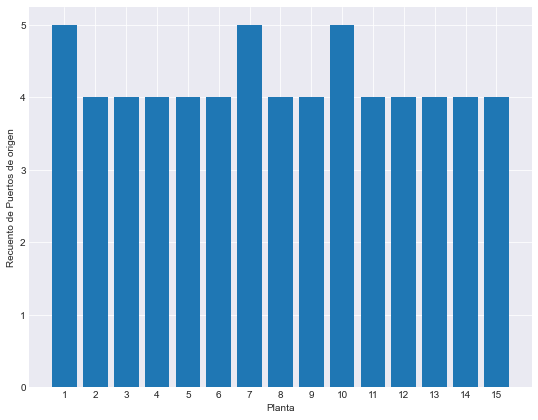

In [9]:
from functions import plot_bar

plot_bar("Planta", "Recuento de Puertos de origen", puertos_agrup_por_planta.index, puertos_agrup_por_planta["Recuento de Puertos de origen"])